In [1]:
import numpy
import pandas
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]

In [2]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=abb1e93a91474f955ca08188cdef98900f71648b56b9e5904f5eedcc7ff0da3f
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [3]:
from yahoofinancials import YahooFinancials
from datetime import datetime

In [4]:
def retrieve_stock_data(ticker, start, end):
    json = YahooFinancials(ticker).get_historical_price_data(start, end, "daily")
    df = pandas.DataFrame(columns=["open","close","adjclose"])
    for row in json[ticker]["prices"]:
        date = datetime.fromisoformat(row["formatted_date"])
        df.loc[date] = [row["open"], row["close"], row["adjclose"]]
    df.index.name = "date"
    return df

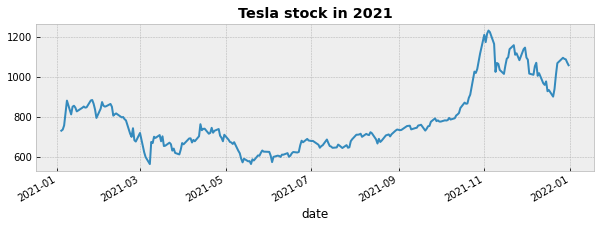

In [6]:
Tesla = retrieve_stock_data("TSLA", "2021-01-01", "2022-01-01")
fig = plt.figure()
fig.set_size_inches(10,3)
MSFT["adjclose"].plot()
plt.title("Tesla stock in 2021", weight="bold");

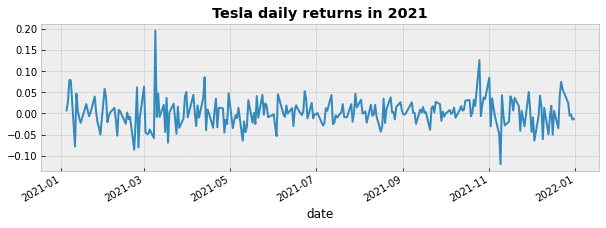

In [7]:
fig = plt.figure()
fig.set_size_inches(10,3)
Tesla["adjclose"].pct_change().plot()
plt.title("Tesla daily returns in 2021", weight="bold");

0.034503697947575906

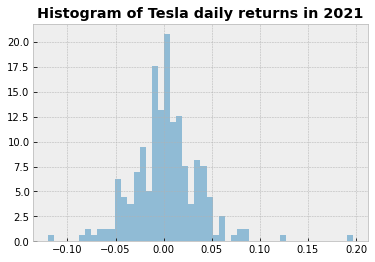

In [8]:
Tesla["adjclose"].pct_change().hist(bins=50, density=True, histtype="stepfilled", alpha=0.5)
plt.title("Histogram of Tesla daily returns in 2021", weight="bold")
Tesla["adjclose"].pct_change().std()

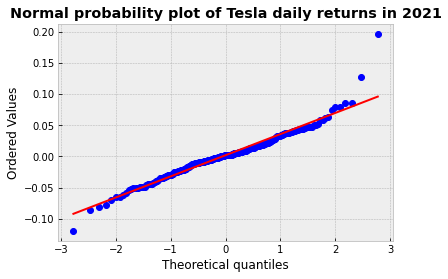

In [9]:
Q = Tesla["adjclose"].pct_change().dropna()
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal probability plot of Tesla daily returns in 2021", weight="bold");

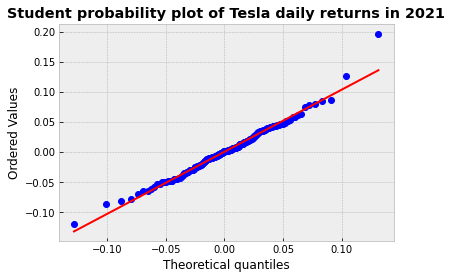

In [10]:
tdf, tmean, tsigma = scipy.stats.t.fit(Q)
scipy.stats.probplot(Q, dist=scipy.stats.t, sparams=(tdf, tmean, tsigma), plot=plt.figure().add_subplot(111))
plt.title("Student probability plot of Tesla daily returns in 2021", weight="bold");

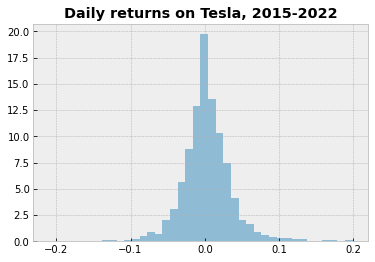

In [12]:
stock = retrieve_stock_data("TSLA", "2015-01-01", "2022-01-01")
returns = stock["adjclose"].pct_change().dropna()
mean = returns.mean()
sigma = returns.std()
tdf, tmean, tsigma = scipy.stats.t.fit(returns)
returns.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)
plt.title("Daily returns on Tesla, 2015-2022", weight="bold");

In [13]:
returns.quantile(0.05)

-0.04830317739524802

The 0.05 empirical quantile of daily returns is at -0.034. That means that with 95% confidence, our worst daily loss will not exceed 3.4%. If we have a 1 M$
  
investment, our  one-day 5% VaR is 0.034 * 1 M$ = 34 000 $